In [1]:
import numpy as np
from fenics import *
from scipy.interpolate import interpn
import matplotlib.pyplot as plt

# Load Marmousi data from a file into a numpy array

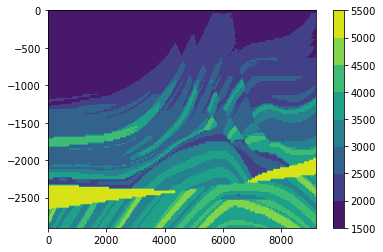

In [2]:
data_file = "marmhard.dat"
# data_file = "marmsmooth.dat"

domain_width = 9192.0 #meters
domain_height = 2904.0 # meters

nx = 384
ny = 122

xx = np.linspace(0., domain_width, nx)
yy = np.linspace(0., -domain_height, ny)

X, Y = np.meshgrid(xx, yy, indexing='ij')
Z = np.loadtxt(data_file).reshape([nx, ny])

plt.contourf(X,Y,Z)
plt.colorbar()

# First interpolate on a coarse mesh to demonstrate the idea

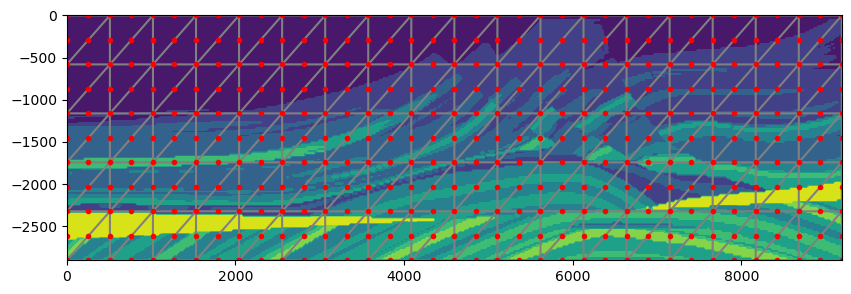

In [3]:
mesh_h = 500
nx_mesh = int(domain_width / mesh_h)
ny_mesh = int(domain_height / mesh_h)

mesh = RectangleMesh(Point([0., -domain_height]), Point([domain_width, 0.]), nx_mesh, ny_mesh)
V = FunctionSpace(mesh, 'CG', 2)
coords = V.tabulate_dof_coordinates()

plt.figure(figsize=(10,8), dpi= 100)
plt.contourf(X,Y,Z)
plot(mesh)
plt.plot(coords[:,0], coords[:,1], '.r')

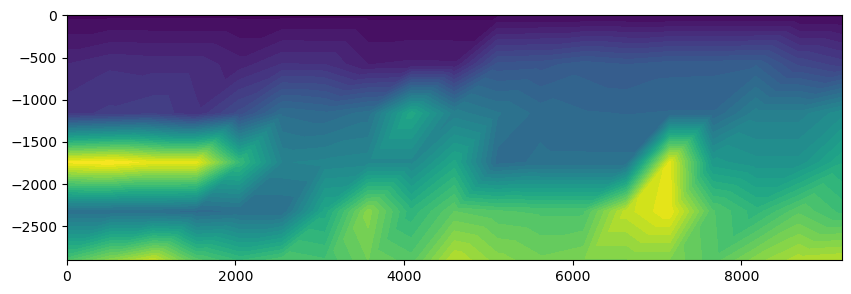

In [4]:
f = Function(V)
f.vector()[:] = interpn((xx, yy[::-1]), Z[:, ::-1], coords) # [::-1] because interpn requires ascending y values

plt.figure(figsize=(10,8), dpi= 100)
plot(f)

# Now interpolate on a fine mesh

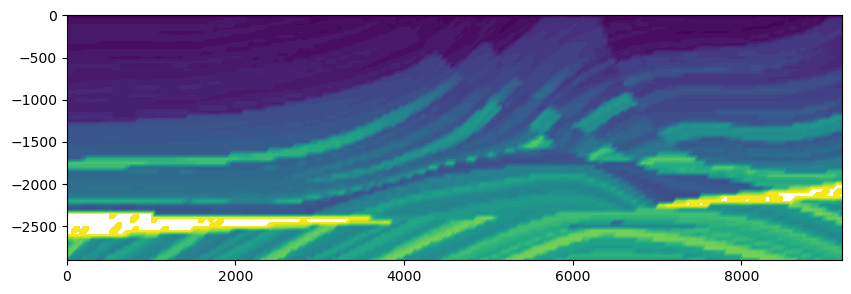

In [5]:
mesh_h = 50
nx_mesh = int(domain_width / mesh_h)
ny_mesh = int(domain_height / mesh_h)

mesh = RectangleMesh(Point([0., -domain_height]), Point([domain_width, 0.]), nx_mesh, ny_mesh)
V = FunctionSpace(mesh, 'CG', 2)
coords = V.tabulate_dof_coordinates()

f = Function(V)
f.vector()[:] = interpn((xx, yy[::-1]), Z[:, ::-1], coords) # [::-1] because interpn requires ascending y values

plt.figure(figsize=(10,8), dpi= 100)
plot(f)